LSTM is a type of RNN, inside of RNN has a tanh activation function but in lstm there are three layers with different activation functions, 1st layer-forget layer, where it is responsible to make decision if the information has to pass or not to the next layer, 2nd layer- update layer, 3rd layer-updating the cell state, updating the cell state from the first two layers, and the final layer is used to let the required information go out to the next cell
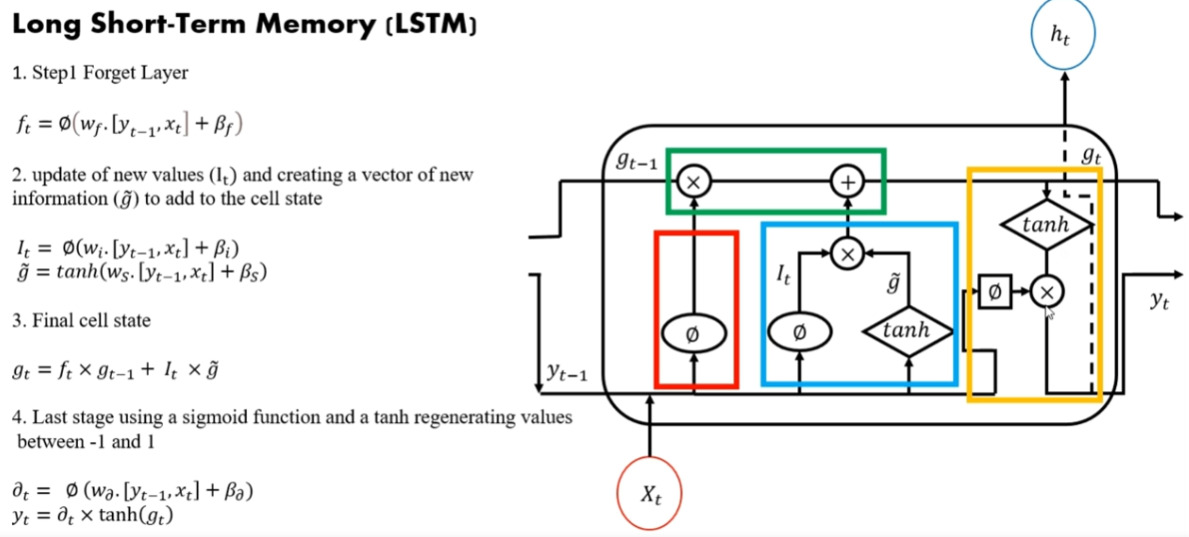

In [1]:
import torch 
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [3]:
df = pd.read_csv('Temp_Data.csv')#since the data is in the same file we need not give the path otherwise we need to give the path to the command

In [4]:
df.head()

,YEAR,MO,DY,HR,Temp
0,2022,1,1,0,7.99
1,2022,1,1,1,7.71
2,2022,1,1,2,7.39
3,2022,1,1,3,7.21
4,2022,1,1,4,7.20


In [5]:
df # the idea of using lstm is to predict the temperature in the last 24 days

,YEAR,MO,DY,HR,Temp
0,2022,1,1,0,7.99
1,2022,1,1,1,7.71
2,2022,1,1,2,7.39
3,2022,1,1,3,7.21
4,2022,1,1,4,7.20
...,...,...,...,...,...
763,2022,2,1,19,-4.28
764,2022,2,1,20,-4.37
765,2022,2,1,21,-4.03
766,2022,2,1,22,-3.31


In [6]:
df = df.iloc[:,-1]
df

0      7.99
1      7.71
2      7.39
3      7.21
4      7.20
       ... 
763   -4.28
764   -4.37
765   -4.03
766   -3.31
767   -2.57
Name: Temp, Length: 768, dtype: float64

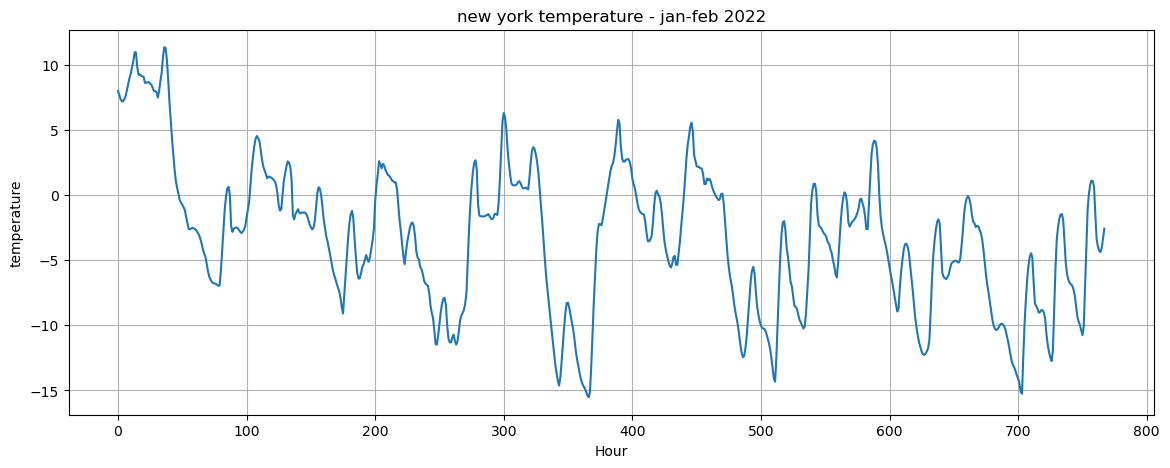

In [8]:
plt.figure(figsize=(14,5))
plt.plot(df)
plt.title('new york temperature - jan-feb 2022')
plt.grid(True)
plt.xlabel('Hour')
plt.ylabel('temperature')
plt.show()

In [9]:
train = df.iloc[:744].values
test = df.iloc[744:].values

even when we have one variable its good to normalize this helps in reducing the noise etc etc

In [42]:
scaler = MinMaxScaler(feature_range=(0,1))
train_n = scaler.fit_transform(train.reshape(-1,1))
train_n


array([[0.87462798],
       [0.86421131],
       [0.85230655],
       [0.84561012],
       [0.8452381 ],
       [0.85193452],
       [0.8608631 ],
       [0.87834821],
       [0.89508929],
       [0.9125744 ],
       [0.92485119],
       [0.9438244 ],
       [0.96205357],
       [0.9858631 ],
       [0.98474702],
       [0.94308036],
       [0.92075893],
       [0.92261905],
       [0.91815476],
       [0.91703869],
       [0.91517857],
       [0.89806548],
       [0.89918155],
       [0.89918155],
       [0.90066964],
       [0.89546131],
       [0.89285714],
       [0.88355655],
       [0.87425595],
       [0.875     ],
       [0.87127976],
       [0.85602679],
       [0.87537202],
       [0.90327381],
       [0.92708333],
       [0.97172619],
       [1.        ],
       [0.99813988],
       [0.96540179],
       [0.91145833],
       [0.84561012],
       [0.7905506 ],
       [0.73995536],
       [0.69456845],
       [0.65104167],
       [0.61830357],
       [0.59784226],
       [0.581

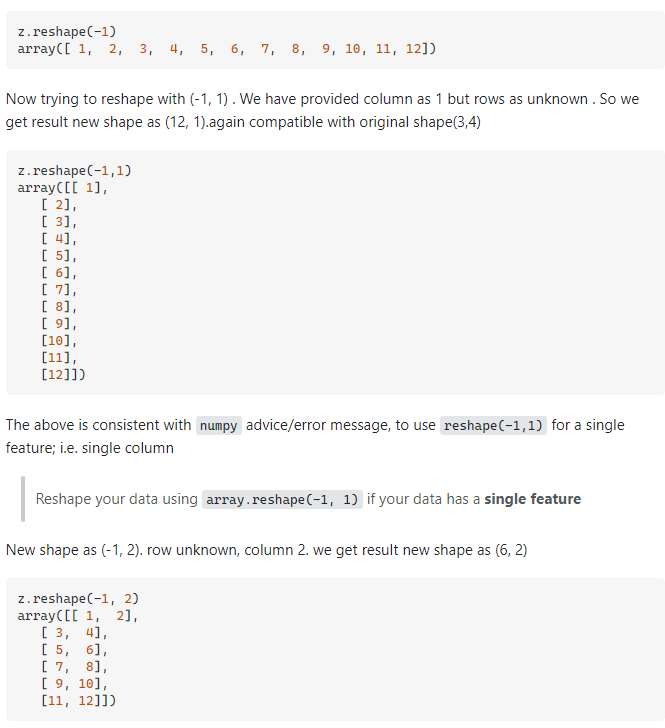

In [43]:
#first step is to tchange the inputs to tensors
train_n = torch.Tensor(train_n)
train_n.shape

torch.Size([744, 1])

In [47]:
train_n = torch.Tensor(train_n).view(-1)
train_n

tensor([0.8746, 0.8642, 0.8523, 0.8456, 0.8452, 0.8519, 0.8609, 0.8783, 0.8951,
        0.9126, 0.9249, 0.9438, 0.9621, 0.9859, 0.9847, 0.9431, 0.9208, 0.9226,
        0.9182, 0.9170, 0.9152, 0.8981, 0.8992, 0.8992, 0.9007, 0.8955, 0.8929,
        0.8836, 0.8743, 0.8750, 0.8713, 0.8560, 0.8754, 0.9033, 0.9271, 0.9717,
        1.0000, 0.9981, 0.9654, 0.9115, 0.8456, 0.7906, 0.7400, 0.6946, 0.6510,
        0.6183, 0.5978, 0.5818, 0.5632, 0.5562, 0.5499, 0.5428, 0.5346, 0.5149,
        0.4974, 0.4807, 0.4795, 0.4821, 0.4840, 0.4821, 0.4799, 0.4762, 0.4699,
        0.4643, 0.4531, 0.4401, 0.4230, 0.4115, 0.4014, 0.3813, 0.3597, 0.3445,
        0.3359, 0.3296, 0.3259, 0.3255, 0.3240, 0.3214, 0.3181, 0.3196, 0.3597,
        0.4174, 0.4792, 0.5357, 0.5725, 0.5964, 0.6012, 0.5785, 0.4888, 0.4725,
        0.4814, 0.4836, 0.4851, 0.4836, 0.4784, 0.4728, 0.4691, 0.4728, 0.4788,
        0.4888, 0.5141, 0.5365, 0.5580, 0.6038, 0.6529, 0.6868, 0.7169, 0.7385,
        0.7463, 0.7403, 0.7318, 0.7068, 

In [48]:
#we need to make our inputs as batches, 
ws = 24  #[1,2,3,4,...........24] --> [25] / [2,3,4,5,.......25] --> [26]
X_train = []
y_train = []
for i in range(train_n.shape[0] - ws):
    X_train.append(train_n[i:i+ws]) #train_n[1:25]
    y_train.append(train_n[i+ws:i+ws+1]) #train_n[25:26] we dont consider the last value in the list during slicing so we get only one number

In [49]:
len(X_train),  len(y_train)
type(X_train)
y_train

[tensor([0.9007]),
 tensor([0.8955]),
 tensor([0.8929]),
 tensor([0.8836]),
 tensor([0.8743]),
 tensor([0.8750]),
 tensor([0.8713]),
 tensor([0.8560]),
 tensor([0.8754]),
 tensor([0.9033]),
 tensor([0.9271]),
 tensor([0.9717]),
 tensor([1.]),
 tensor([0.9981]),
 tensor([0.9654]),
 tensor([0.9115]),
 tensor([0.8456]),
 tensor([0.7906]),
 tensor([0.7400]),
 tensor([0.6946]),
 tensor([0.6510]),
 tensor([0.6183]),
 tensor([0.5978]),
 tensor([0.5818]),
 tensor([0.5632]),
 tensor([0.5562]),
 tensor([0.5499]),
 tensor([0.5428]),
 tensor([0.5346]),
 tensor([0.5149]),
 tensor([0.4974]),
 tensor([0.4807]),
 tensor([0.4795]),
 tensor([0.4821]),
 tensor([0.4840]),
 tensor([0.4821]),
 tensor([0.4799]),
 tensor([0.4762]),
 tensor([0.4699]),
 tensor([0.4643]),
 tensor([0.4531]),
 tensor([0.4401]),
 tensor([0.4230]),
 tensor([0.4115]),
 tensor([0.4014]),
 tensor([0.3813]),
 tensor([0.3597]),
 tensor([0.3445]),
 tensor([0.3359]),
 tensor([0.3296]),
 tensor([0.3259]),
 tensor([0.3255]),
 tensor([0.3240]

In [50]:
class LSTM(nn.Module):
    def __init__(self,input_size = 1,hiddensize=60,oputputsize = 1):#the whole tensor is considerd as 1 input, 60 nuerons, 1 value we are predicting so 1 oputput.
        super().__init__()

        self.hiddensize = hiddensize
        self.lstm = nn.LSTM(input_size,hiddensize)#we defined the lstm layer
        self.linear = nn.Linear(hiddensize,oputputsize) #we defined the linear layer

        #hidden states and cell states of the lstm model
        self.hidden_cell = (torch.zeros(1,1,self.hiddensize),torch.zeros(1,1,self.hiddensize))#we have initialized both the hidden and cell states in a single tuple
        #first dim is number of layers since we have one lstm layer we use 1 here, 2nd one is the batch size, we are sending each tensor 
    
    def forward(self,input_seq):                              #(windowsize,1,inpust_size)
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq),1,-1),self.hidden_cell)
        prediction = self.linear(lstm_out.view(len(input_seq),-1))

        return prediction[-1]
    
model = LSTM()


In [51]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)


In [61]:
epochs = 50
for i in range(epochs):
    optimizer.zero_grad()
    model.hidden_cell = (torch.zeros(1,1,model.hiddensize),torch.zeros(1,1,model.hiddensize)) 
    #this is how we initialize the weights for the hidden and the cell states, so we start off with the values that we have initialized with in the class
    #for every epcoh we need to initialize the hidden and cell states so that the previous data set will not have any influence on the next one
    for x in X_train:
        y_pred = model(x)

    for y in y_train:
        loss = criterion(y_pred,y)

loss.backward()
optimizer.step()

print(f'epoch:{i:2},loss: {loss.item(): 8.6f}')

epoch:49,loss:  0.136191


tensor([0.2481, 0.2422, 0.2232, 0.1801, 0.1492, 0.1287, 0.1131, 0.1034, 0.1339,
        0.2470, 0.3679, 0.4498, 0.4862, 0.5100, 0.5216, 0.5234, 0.5060, 0.4490,
        0.3839, 0.3519, 0.3352, 0.3274, 0.3225, 0.3188])

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

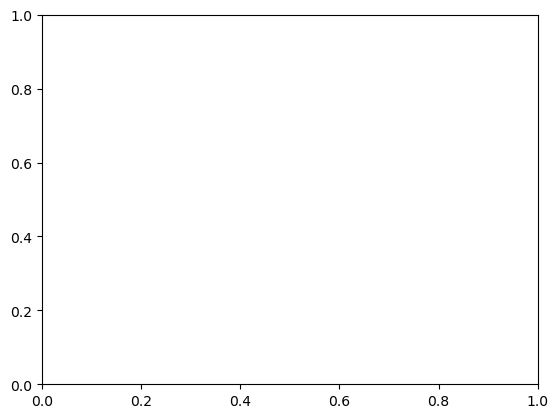

In [54]:
# plt.plot(y_pred, color = 'red', label = 'predicted values')
# plt.plot(y, color = 'blue', label = 'actual values')
# plt.title('pred vs true')
# plt.xlabel('Time')
# plt.ylabel('values')
# plt.legend()
# plt.show()